<a href="https://colab.research.google.com/github/mxtqnt/Grafos/blob/main/TrabalhoGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

# Função para gerar um grafo simples e conexo

In [60]:
# Função para gerar um grafo simples e conexo
def gerar_grafo_conexo(n, matriz_custo):
    # Inicializa a matriz de adjacência e cria o grafo
    matriz_adjacencia = matriz_custo.copy()
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Garantir a conectividade: Criar uma árvore geradora mínima (spanning tree)
    # Isso garante que o grafo seja conectado
    nodes = list(range(n))
    random.shuffle(nodes)

    for i in range(n - 1):
        u = nodes[i]
        v = nodes[i + 1]
        numero_aleatorio = random.randint(1, 5)
        matriz_custo[u, v] = numero_aleatorio
        matriz_custo[v, u] = numero_aleatorio  # Como é um grafo não-direcionado
        matriz_adjacencia[u, v] = 1
        matriz_adjacencia[v, u] = 1
        G.add_edge(u, v, weight=numero_aleatorio)

    # Adicionar arestas extras aleatórias
    num_arestas_extras = random.randint(n, 2 * n)
    while num_arestas_extras > 0:
        u, v = random.sample(range(n), 2)
        if not G.has_edge(u, v):
            numero_aleatorio = random.randint(1, 5)
            matriz_custo[u, v] = numero_aleatorio
            matriz_custo[v, u] = numero_aleatorio  # Grafo não-direcionado
            matriz_adjacencia[u, v] = 1
            matriz_adjacencia[v, u] = 1
            G.add_edge(u, v, weight=numero_aleatorio)
            num_arestas_extras -= 1

    dfcusto = pd.DataFrame(matriz_custo)
    dfadjacencia = pd.DataFrame(matriz_adjacencia)
    print(f"Matriz Adjacência: \n{dfadjacencia}")

    return G, dfcusto, dfadjacencia

# Função para desenhar o grafo

In [61]:
# Função para desenhar o grafo
def desenhar_grafo(G, n):

    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, 20)  # Layout do grafo

    # edges
    nx.draw_networkx_edges(G, pos, edge_color="#c1121f", width=2)

    #node
    nx.draw_networkx_nodes(G, pos, node_color="#780000", node_size=350)

    # node labels
    nx.draw_networkx_labels(G, pos, font_color="white", font_family="sans-serif")

    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color="#780000", font_family="sans-serif")
    plt.title(f'Grafo Conexo com {n} nós')
    plt.show()

# Gerando grafos simples e conexos com 10, 50 e 100 nós

Matriz Adjacência: 
     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0
1  0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0
2  0.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0
3  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0
4  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
6  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0
7  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0
8  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0
9  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0


0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  5.0  4.0  1.0  5.0  4.0  0.0  3.0
1  0.0  0.0  2.0  5.0  0.0  4.0  4.0  0.0  2.0  0.0
2  0.0  2.0  0.0  5.0  4.0  3.0  5.0  0.0  2.0  0.0
3  5.0  5.0  5.0  0.0  1.0  0.0  0.0  0.0  4.0  5.0
4  4.0  0.0  4.0  1.0  0.0  4.0  1.0  2.0  5.0  4.0
5  1.0  4.0  3.0  0.0  4.0  0.0  1.0  0.0  4.0  0.0
6  5.0  4.0  5.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0
7  4.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0  2.0  0.0
8  0.0  2.0  2.0  4.0  5.0  4.0  0.0  2.0  0.0  0.0
9  3.0  0.0  0.0  5.0  4.0  0.0  1.0  0.0  0.0  0.0

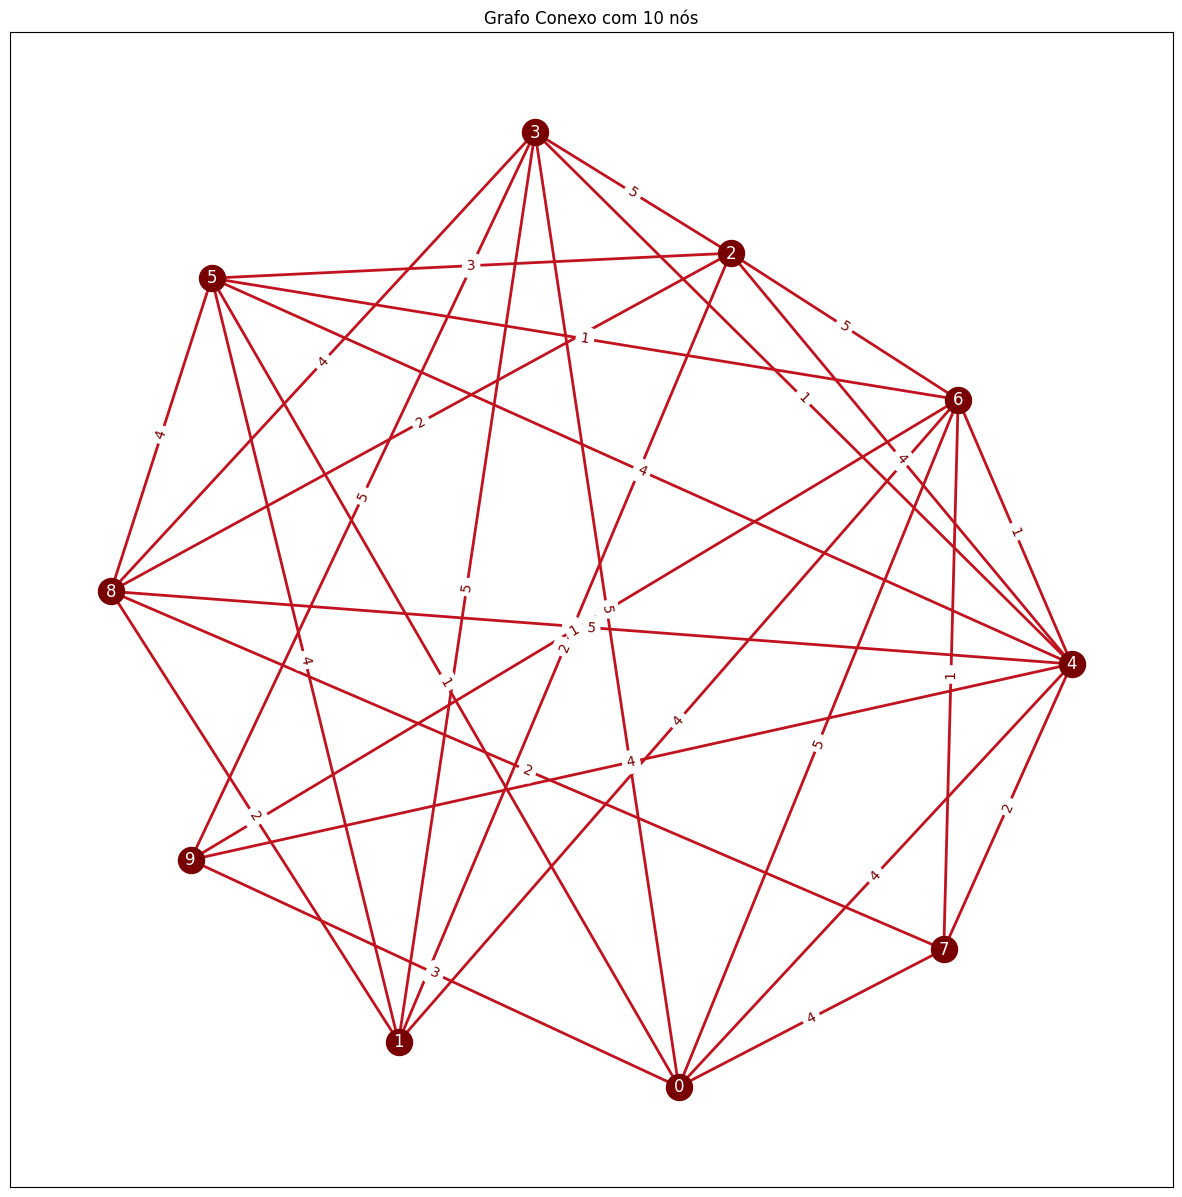

Matriz Adjacência: 
     0    1    2    3    4    5    6    7    8    9   ...   40   41   42   43  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0   
2   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
6   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
11  0.0 

0    1    2    3    4    5    6    7    8    9   ...   40   41   42   43  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  ...  0.0  0.0  0.0  3.0   
2   0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  5.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  5.0  0.0  0.0  4.0  3.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  3.0  0.0   
6   0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  ...  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  4.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  4.0  0.0  5.0  3.0  0.0  0.0  0.0  ...  0.0  0.0  4.0  0.0   
11  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  3.0  ...  0.0  0.0  0.0  3.0   
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  ...  0.0  0.0  0.0  0.0   
13  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
14  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
16  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
17  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
18  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  1.0  0.0  5.0   
21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  ...  0.0  3.0  0.0  0.0   
22  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  3.0  0.0   
25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  0.0  0.0  0.0   
27  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2.0  0.0  0.0   
29  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
30  0.0  0.0  3.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
31  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
32  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
33  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
34  0.0  1.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
35  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0  0.0   
36  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  3.0  0.0   
37  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0  0.0   
38  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
39  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
40  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  5.0  0.0   
41  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
42  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0  0.0   
43  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
44  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  ...  0.0  3.0  0.0  2.0   
45  0.0  0.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
46  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
47  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
48  0.0  0.0  0.0  0.0  0.0  0.0  0.

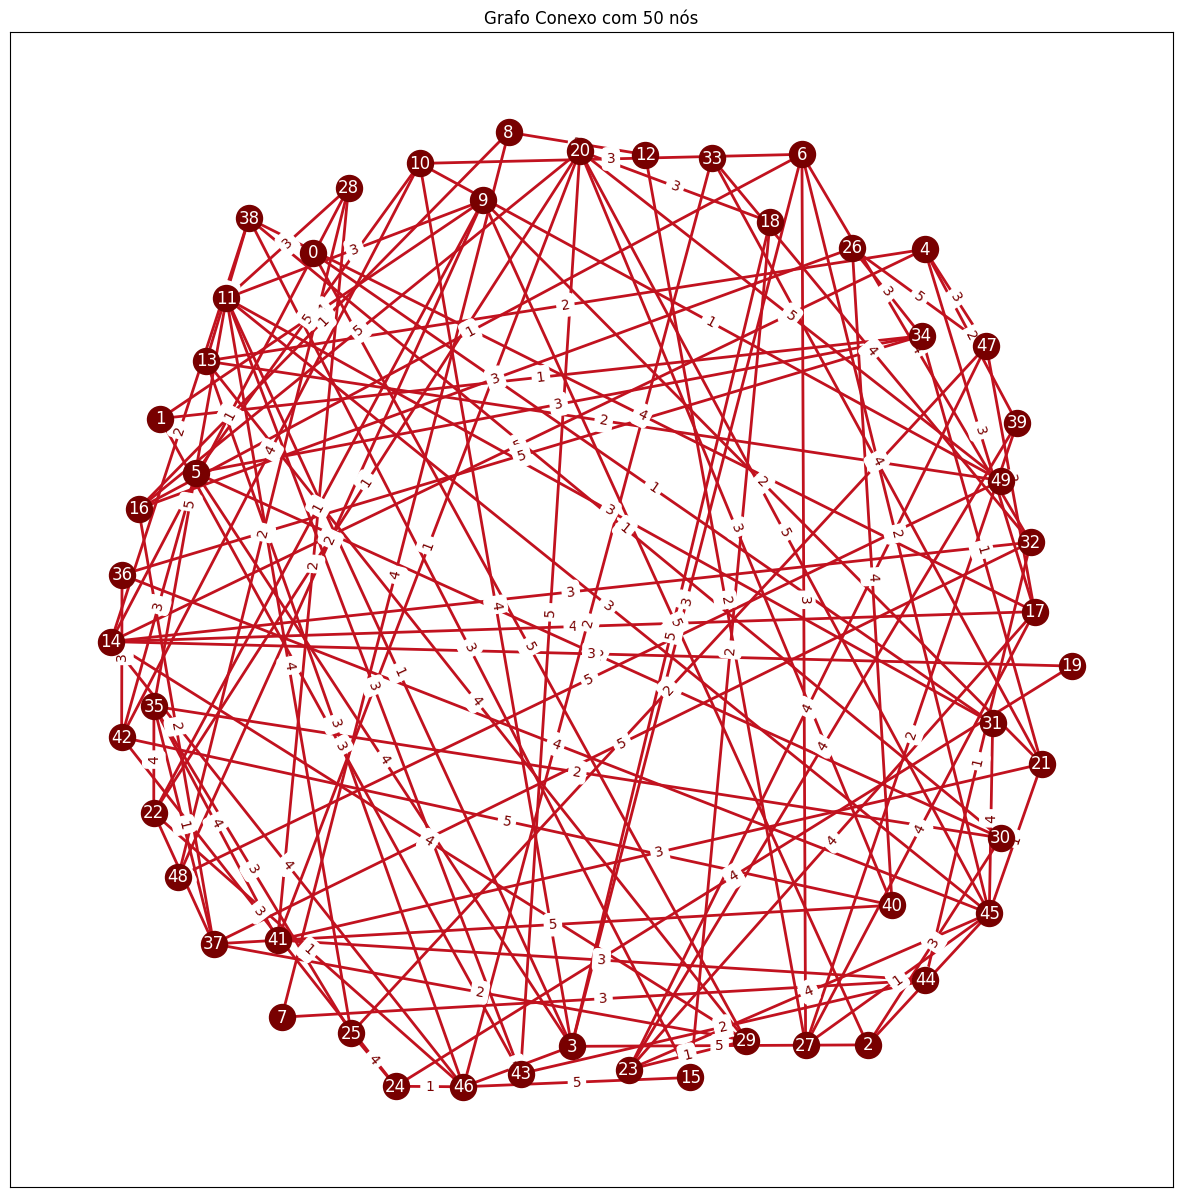

Matriz Adjacência: 
     0    1    2    3    4    5    6    7    8    9   ...   90   91   92   93  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
96  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
97  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
98  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
99  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     94

0    1    2    3    4    5    6    7    8    9   ...   90   91   92   93  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0   
96  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
97  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
98  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
99  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     94   95   96   97   98   99  
0   0.0  0.0  0.0  0.0  0.0  1.0  
1   0.0  0.0  0.0  0.0  0.0  0.0  
2   0.0  0.0  0.0  0.0  0.0  0.0  
3   0.0  0.0  0.0  0.0  0.0  0.0  
4   0.0  0.0  0.0  0.0  0.0  0.0  
..  ...  ...  ...  ...  ...  ...  
95  0.0  0.0  0.0  0.0  0.0  0.0  
96  0.0  0.0  0.0  0.0  0.0  0.0  
97  0.0  0.0  0.0  0.0  0.0  0.0  
98  0.0  0.0  0.0  0.0  0.0  0.0  
99  0.0  0.0  0.0  0.0  0.0  0.0  

[100 rows x 100 columns]

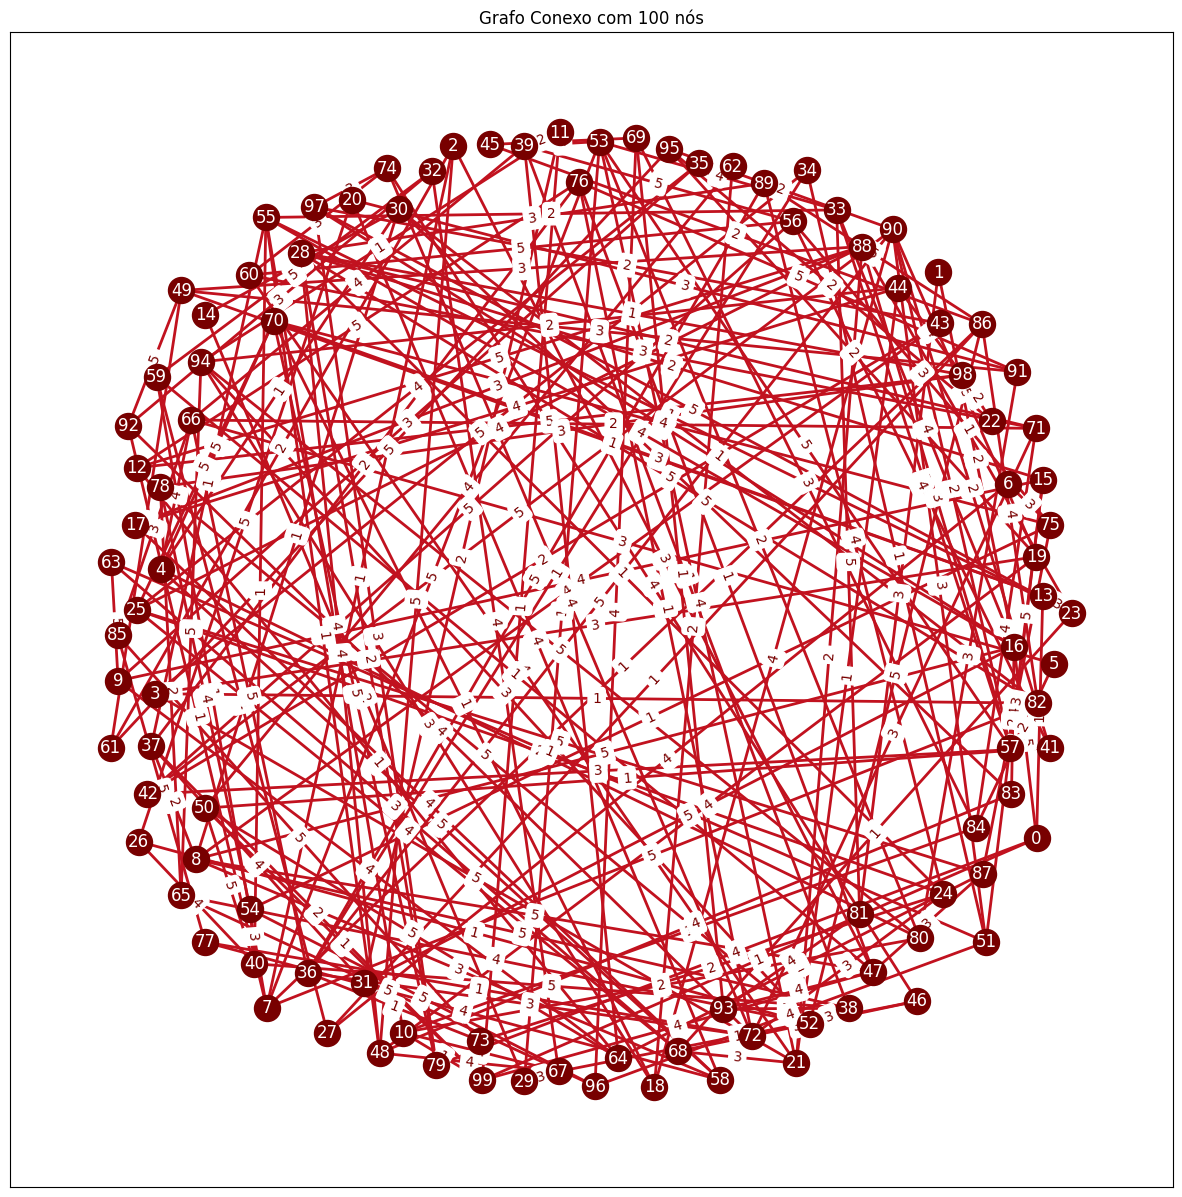

In [62]:
matrizes_custo = [None] * 3
matrizes_adjacencia = matrizes_custo.copy()

# Gerar e desenhar grafos com n = 10, 50, 100
for pos,n in enumerate([10, 50, 100]):
    matriz_vazia = np.zeros((n, n))
    G,matrizes_custo[pos],matrizes_adjacencia[pos] = gerar_grafo_conexo(n, matriz_vazia)
    display(matrizes_custo[pos])
    desenhar_grafo(G, n)

# Rodando o Algoritmo de Kruskal nos Grafos

## Algoritmo de Kruskal

In [63]:
def find(parent, i):
		if parent[i] != i:

			# Usa Compressão de cominho para atribuir um nó ao nó raiz
			parent[i] = find(parent, parent[i])
		return parent[i]

def union(parent, rank, x, y):

		# Junta árvores menores em árvores maiores
		if rank[x] < rank[y]:
			parent[x] = y
		elif rank[x] > rank[y]:
			parent[y] = x

		# Se o rank for o mesmo, cria uma árvore raíz única
		# e incrementa o rank em 1
		else:
			parent[y] = x
			rank[x] += 1

def KruskalMST(lista_aresta):

  # Armazena o MST
  result = []

  # indíce para as arestas ordenadas
  i = 0

  # índice para o MST
  e = 0

  parent = []
  rank = []

  # Cria subconjuntos de 1 elemento
  for node in range(len(lista_aresta)):
    parent.append(node)
    rank.append(0)


  while i < len(lista_aresta) - 1:
    # Pega a menor aresta e incrementa i
    u, v, w = lista_aresta[i]
    i = i + 1
    x = find(parent, u)
    y = find(parent, v)

    # Se incluir a aresta não fechar um ciclo, incluir no result e aumentar o e
    if x != y:
      e = e + 1
      result.append([u, v, w])
      union(parent, rank, x, y)

  minimumCost = 0
  for u, v, weight in result:
    minimumCost += weight

  print("Árvore de Custo Mínimo: ", minimumCost)
  dfResult = pd.DataFrame(result)
  dfResult= dfResult.rename(columns={0:'origem',
                                   1:'destino',
                                   2:'peso'}).copy()

  return dfResult,result




## Listando arestas e seus custos em ordem crescente

In [64]:
# Função pra Ordenar a Lista de Arestas
def sortAresta(matriz_custo):
  lista_aresta = []

  for i in range(len(matriz_custo)):
      for j in range(len(matriz_custo)):
          if matriz_custo[i][j] != 0:
            lista_aresta.append((i,j,matriz_custo[i][j]))

  lista_aresta.sort(key=lambda x: x[2])
  return lista_aresta


MST do Grafo de 10 nós

In [65]:
lista_aresta = sortAresta(matrizes_custo[0])

KruskalMST(lista_aresta)


Árvore de Custo Mínimo:  12.0


(   origem  destino  peso
 0       0        5   1.0
 1       3        4   1.0
 2       4        6   1.0
 3       5        6   1.0
 4       6        7   1.0
 5       6        9   1.0
 6       1        2   2.0
 7       1        8   2.0
 8       7        8   2.0,
 [[0, 5, 1.0],
  [3, 4, 1.0],
  [4, 6, 1.0],
  [5, 6, 1.0],
  [6, 7, 1.0],
  [6, 9, 1.0],
  [1, 2, 2.0],
  [1, 8, 2.0],
  [7, 8, 2.0]])

MST do Grafo de 50 nós

In [66]:
lista_aresta = sortAresta(matrizes_custo[1])

KruskalMST(lista_aresta)

Árvore de Custo Mínimo:  90.0


(    origem  destino  peso
 0        0       31   1.0
 1        1       34   1.0
 2        3       11   1.0
 3        3       46   1.0
 4        6       16   1.0
 5        8       16   1.0
 6        9       22   1.0
 7       10       49   1.0
 8       14       28   1.0
 9       20       22   1.0
 10      20       41   1.0
 11      21       34   1.0
 12      21       45   1.0
 13      22       46   1.0
 14      23       29   1.0
 15      24       46   1.0
 16      27       45   1.0
 17      30       38   1.0
 18      32       44   1.0
 19      35       37   1.0
 20       4       13   2.0
 21       4       39   2.0
 22       5       30   2.0
 23       6       45   2.0
 24       8       12   2.0
 25       9       21   2.0
 26       9       48   2.0
 27      13       49   2.0
 28      14       38   2.0
 29      15       18   2.0
 30      16       37   2.0
 31      25       47   2.0
 32      27       39   2.0
 33      28       41   2.0
 34      29       37   2.0
 35      33       46   2.0
 

MST do Grafo de 100 nós

In [67]:
lista_aresta = sortAresta(matrizes_custo[2])

KruskalMST(lista_aresta)

Árvore de Custo Mínimo:  181.0


(    origem  destino  peso
 0        0       13   1.0
 1        0       99   1.0
 2        2        7   1.0
 3        3       82   1.0
 4        4       30   1.0
 ..     ...      ...   ...
 94      66       85   3.0
 95      69       84   3.0
 96      78       98   3.0
 97       9       15   4.0
 98      51       96   4.0
 
 [99 rows x 3 columns],
 [[0, 13, 1.0],
  [0, 99, 1.0],
  [2, 7, 1.0],
  [3, 82, 1.0],
  [4, 30, 1.0],
  [7, 59, 1.0],
  [7, 86, 1.0],
  [7, 92, 1.0],
  [8, 30, 1.0],
  [10, 84, 1.0],
  [10, 99, 1.0],
  [11, 94, 1.0],
  [11, 99, 1.0],
  [12, 64, 1.0],
  [13, 49, 1.0],
  [18, 70, 1.0],
  [21, 44, 1.0],
  [23, 55, 1.0],
  [23, 68, 1.0],
  [23, 88, 1.0],
  [24, 28, 1.0],
  [26, 52, 1.0],
  [27, 59, 1.0],
  [28, 98, 1.0],
  [29, 53, 1.0],
  [30, 82, 1.0],
  [34, 36, 1.0],
  [34, 51, 1.0],
  [36, 73, 1.0],
  [37, 55, 1.0],
  [38, 39, 1.0],
  [39, 53, 1.0],
  [40, 55, 1.0],
  [41, 50, 1.0],
  [46, 67, 1.0],
  [47, 59, 1.0],
  [47, 76, 1.0],
  [48, 55, 1.0],
  [50, 99, 1.0

## Gerando desenhos das Árvores Geradora Mínima

Função para Gerar um MST

In [68]:
# Função para gerar um MST
def gerar_MST(n,mst):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Adicionar arestas da MST
    num_arestas = len(mst)
    while num_arestas > 0:
        u, v , peso = mst[num_arestas - 1]
        if not G.has_edge(u, v):
            G.add_edge(u, v, weight = peso)
            num_arestas -= 1

    return G

Desenhando MST de 10 nós

Árvore de Custo Mínimo:  12.0


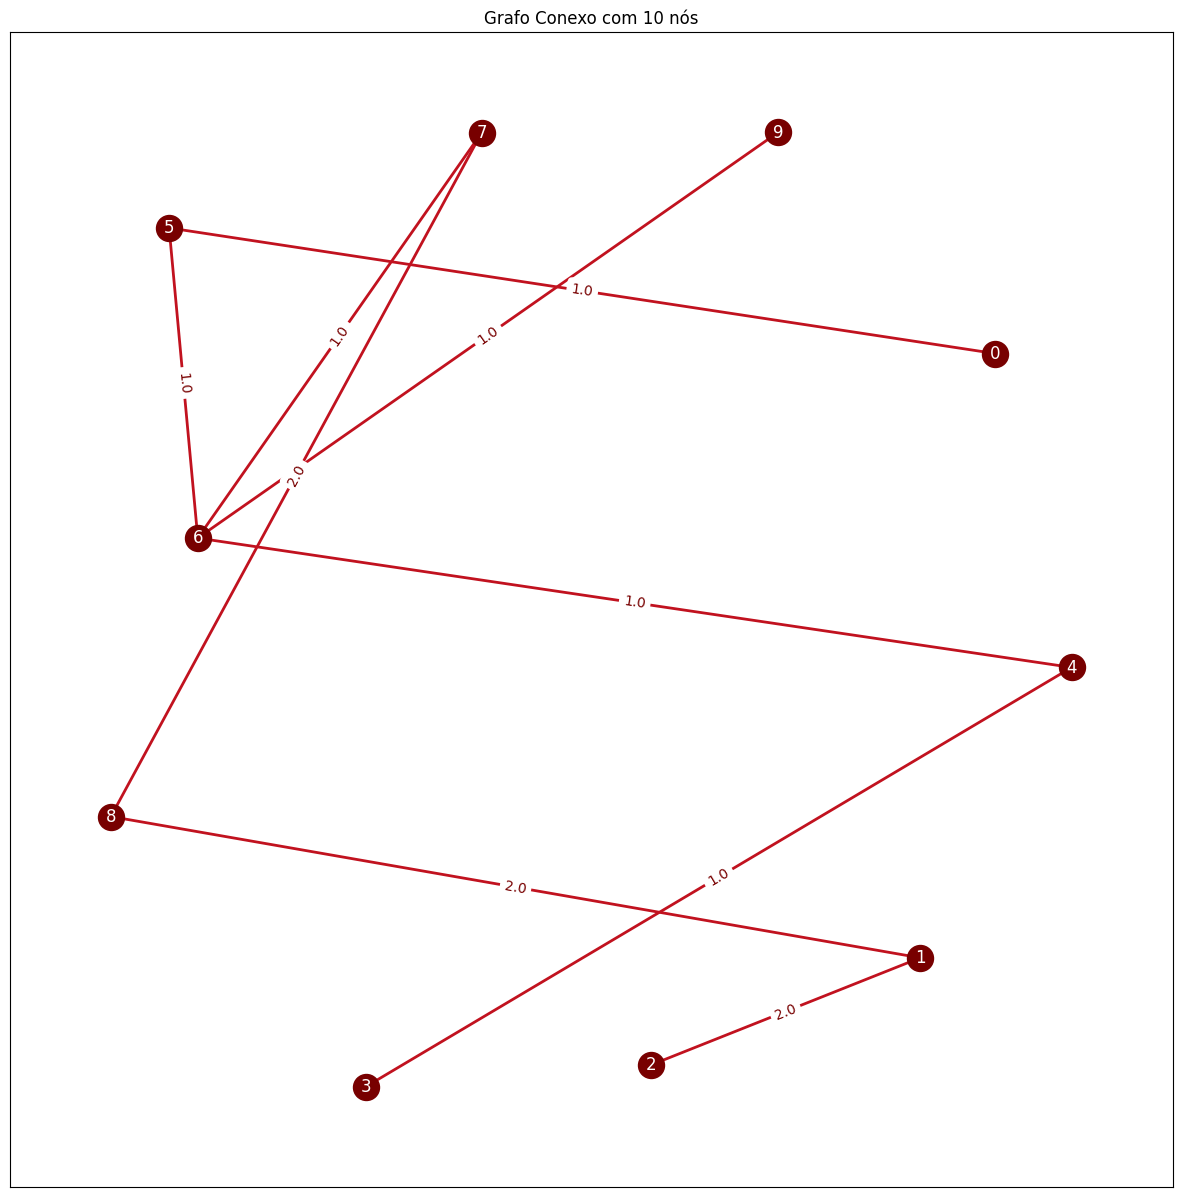

In [69]:
lista_aresta = sortAresta(matrizes_custo[0])
_,k= KruskalMST(lista_aresta)

desenhar_grafo(gerar_MST(10,k),10)

Desenhando o MST do Grafo de 50 nós

Árvore de Custo Mínimo:  90.0


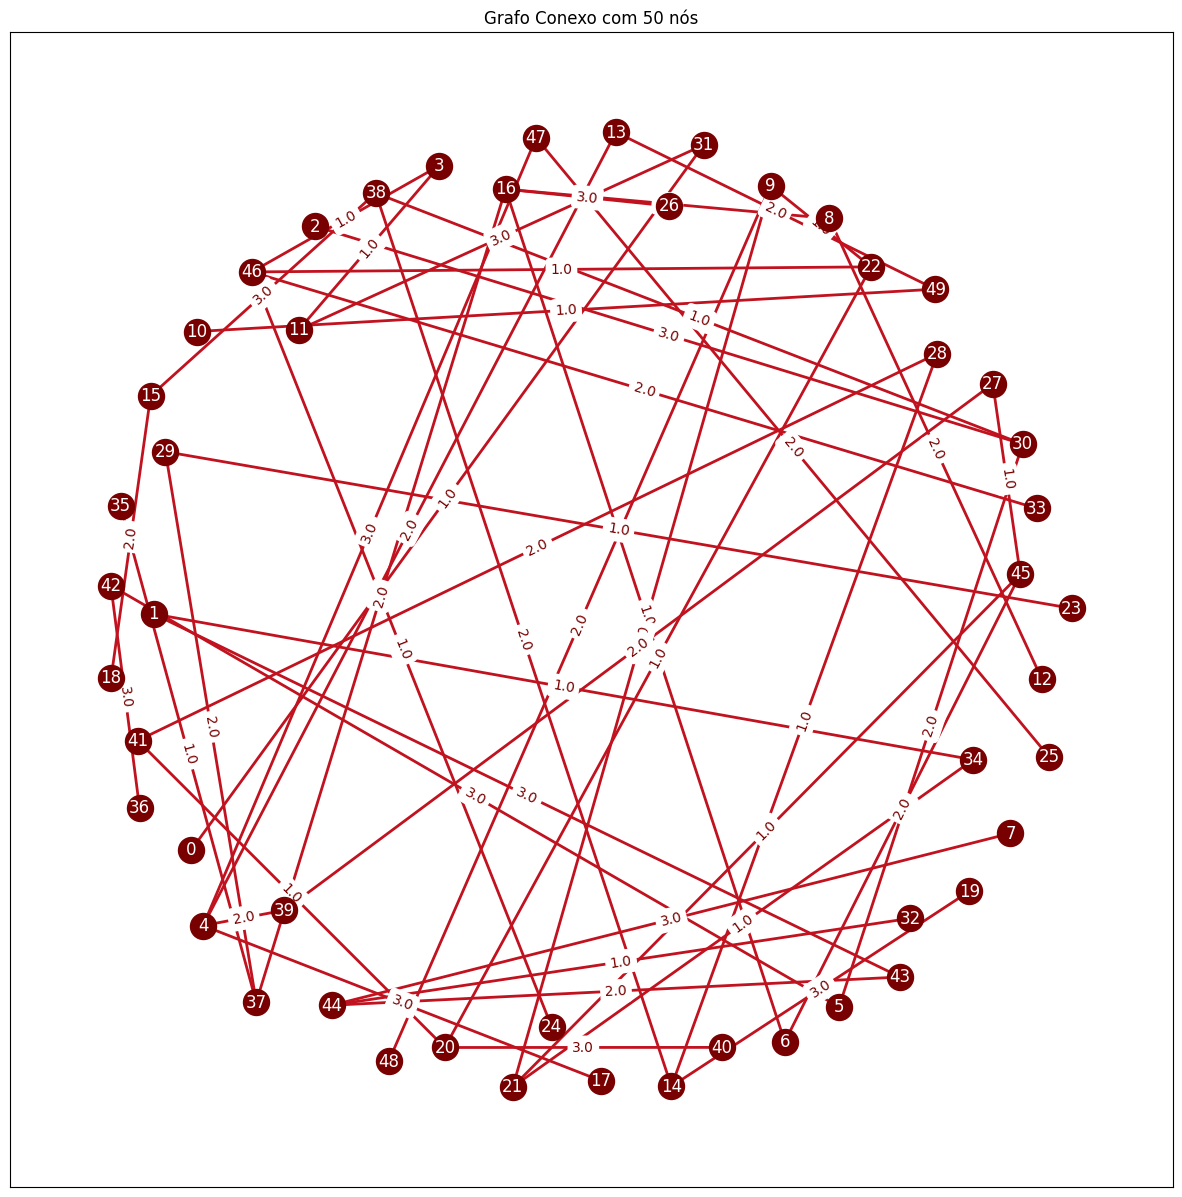

In [70]:
lista_aresta = sortAresta(matrizes_custo[1])
_,k= KruskalMST(lista_aresta)

desenhar_grafo(gerar_MST(50,k),50)

Desenhando a MST do Grafo de 100 nós

Árvore de Custo Mínimo:  181.0


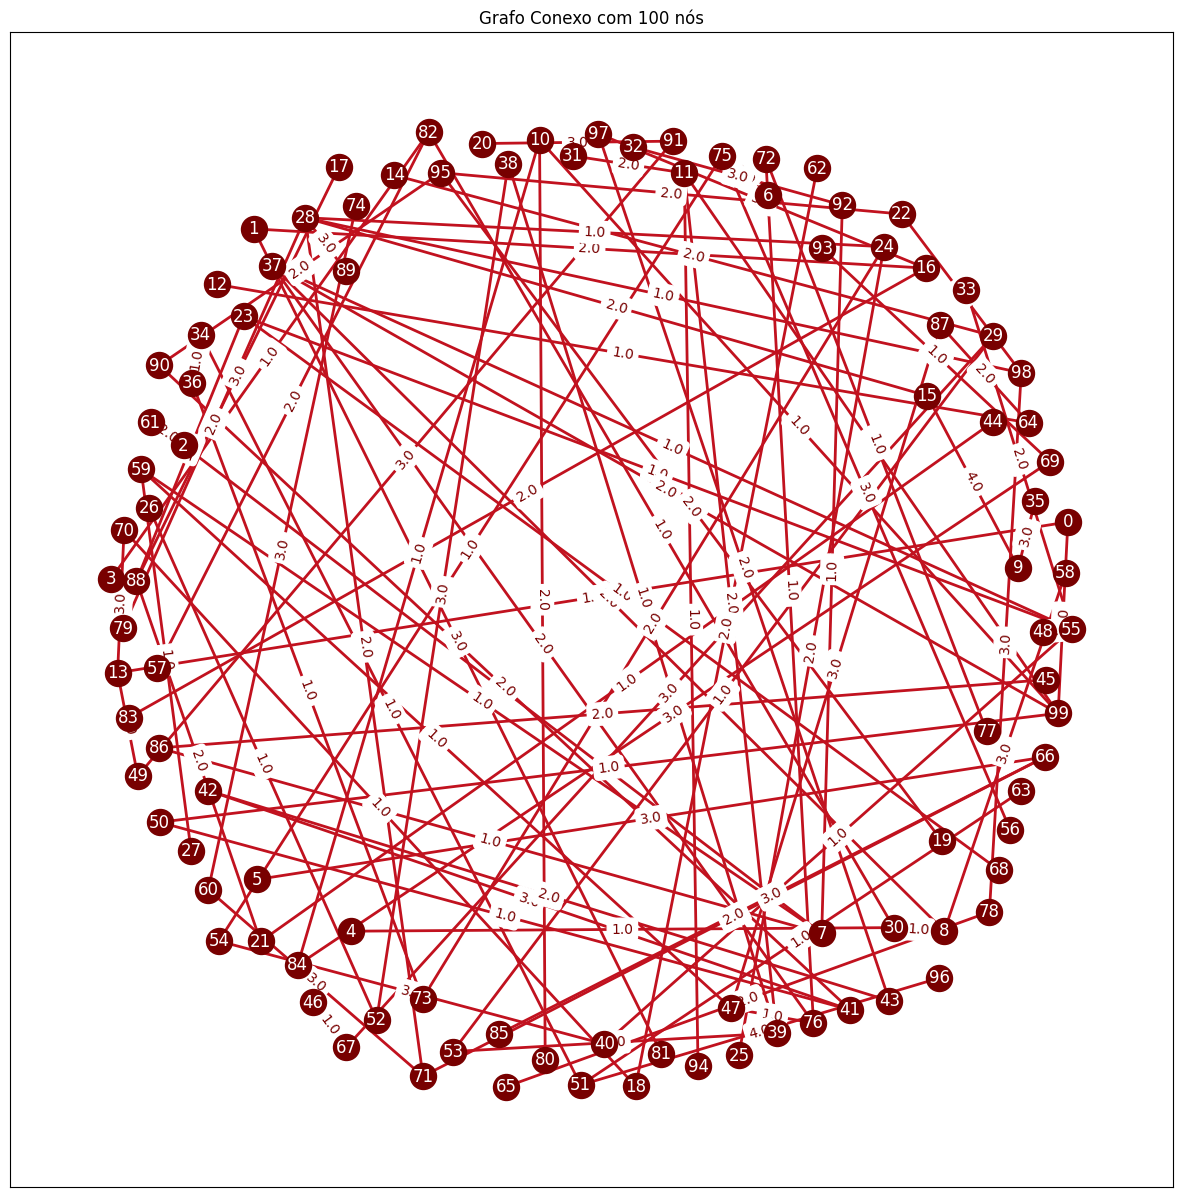

In [71]:
lista_aresta = sortAresta(matrizes_custo[2])
_,k= KruskalMST(lista_aresta)

desenhar_grafo(gerar_MST(100,k),100)

# Artigo


---

link para o artigo: https://www.researchgate.net/profile/Putri-Indah-Pramesti/publication/381519447_Application_of_Graph_Theory_to_Computer_Networks_Using_the_Kruskal_Algorithm/data/66726682a54c5f0b946e2804/Application-of-Graph-Theory-to-Computer-Networks-Using-the-Kruskal-Algorithm.pdf


---

pergunta do trabalho?

Como a teoria dos grafos pode ser aplicada no contexto de redes da computação

---


Porque?

A teoria dos grafos permite a construção de modelos de relacionamento entre os computadores na rede para uma melhor analise de performasse e segurança

---

Como?

Uso de algorítimos para achar o menor caminho, como Dijkstra, e saber como a estrutura do grafo é relevante para entender pontos vulnerareis e posáveis ataques a rede

---

proposta do artigo?

mostrar uma aplicação do Kruskal para mostrar o s benefícios dele na gerencia e eficiencia da rede

---
Método de pesquisa

  * estudo sobre grafos, árvore geradora mínima, e kruskal.
  * criação de vários exemplos de grafo
  * implementação do kruskal usando java
  * comparar o resultado com as literaturas já existentes


---

resultados:

para as analise foi usado um datasert com informações sobre uma topologia de rede, incluindo os nos (computadores) e as conexões


também foi feito um calculo de performasse ficando como mostra nas tabelas

*TABELA DE TEMPO DE EXECUÇÃO*


|algorítimo | tempo |
|-----------|-------|
|kruskal    | 5.7 ms|
|prim       | 3.2 ms|


*USO DE MEMORIA*


|algorítimo | tempo |
|-----------|-------|
|kruskal    | 12 MB |
|prim       | 8 MB  |

A eficiencia do algorítimo é influenciada pela topologia da rede

Sendo assim, o algorítimo Kruskal teve um bom desempenho com uma complexidade O(E log V), onde E é o numero de arestas e V de vértices

Um Grafo para o teste

| vértice 1 | vértice 2 | peso |
|-----------|-----------|------|
| 0         | 1         | 92   |
| 0         | 2         | 167  |
| 0         | 3         | 128  |
| 1         | 3         | 86   |
| 1         | 3         | 76   |
| 2         | 3         | 100  |

peso em cm, totalizando 649 cm

Árvore minima gerada

| vértice 1  | vértice 2 | peso |
|------------|-----------|-----|
| 0          | 1         | 92  |
| 1          | 2         | 86  |
| 1          | 3         | 76  |

totalizando 254cm


sera que é melhor colocar as images?

In [72]:


# precisa arrumar uma forma de gerar arestas aleatoriamente
# há uma forma de descobrir o número máximo de vértices que um grafo pode ter?
# Se sim, podemos usar esse número para um loop
# Nesse loop, iremos escolher aleatoriamente os nós criados para criar os vértices


def gerar_grafo_conexo(n, matriz_adjacencia):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Criar uma árvore básica para garantir que o grafo seja conexo
    for i in range(n - 1):
        G.add_edge(i, i + 1) #aquiiiiiis

    # Adicionar arestas extras para tornar o grafo mais interessante
    num_arestas_extras = random.randint(n, 2 * n)
    while num_arestas_extras > 0:
        u, v = random.sample(range(n), 2)
        if not G.has_edge(u, v):
            numero_aleatorio = random.randint(50, 10000)
            matriz_adjacencia[u, v] = numero_aleatorio
            G.add_edge("c", "f", weight= random.randint(0,10))
            num_arestas_extras -= 1

    print(matriz_adjacencia)
    return G


for n in [10, 50, 100]:
    matriz_vazia = np.zeros((n, n))
    G = gerar_grafo_conexo(n, matriz_vazia)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

[[   0.    0.    0.    0. 7047. 2305.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0. 1660.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0. 7785.    0.]
 [   0.    0.    0.    0.    0.    0. 8469. 4596.    0.    0.]
 [   0.    0.    0. 2515.    0.    0.    0.    0. 6577.    0.]
 [   0.    0.    0.    0. 6016.    0.    0.    0.    0.    0.]
 [4474.    0.    0.    0.    0.    0.    0.    0.    0. 7971.]
 [   0.    0.    0. 9491.    0.    0.    0.    0.    0.    0.]
 [3737.    0. 1545.    0.    0.    0.    0. 9649.    0.    0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


KeyError: 'weight'